## Frequency response plots

Frequency responses are very easy to calculate numerically if we remember that the frequency domain is basically the part of the Laplace domain on the imaginary axis, or mathematically $s=i\omega$

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Frequency responses often make use of logarithmic scales, so we'll generate logaritmically spaced points. This will be linearly spaced on a logarithmic scale:

In [2]:
omega = numpy.logspace(-2, 2, 1000)

In [3]:
s = omega*1j

It is important to realise that `omega` and `s` are just collections of numbers:

In [4]:
omega[:5]

array([0.01      , 0.01009262, 0.0101861 , 0.01028045, 0.01037567])

In [5]:
s[:5]

array([0.+0.01j      , 0.+0.01009262j, 0.+0.0101861j , 0.+0.01028045j,
       0.+0.01037567j])

As an example, we can use a first order transfer function

In [6]:
tau1 = 2

In [7]:
G1 = 1/(tau1*s + 1)

and a second order with complex poles

In [8]:
tau = 1

In [9]:
zeta = 0.5

In [10]:
G2 = 1/(tau**2*s**2 + 2*tau*zeta*s + 1)

Similarly to `omega` and `s`, `G1` and `G2` are just arrays.

In [11]:
G1[:5]

array([0.99960016-0.019992j  , 0.99959272-0.02017702j,
       0.99958515-0.02036375j, 0.99957743-0.02055221j,
       0.99956957-0.0207424j ])

In [12]:
G2[:5]

array([0.99999999-0.010001j  , 0.99999999-0.01009365j,
       0.99999999-0.01018716j, 0.99999999-0.01028153j,
       0.99999999-0.01037678j])

## Bode

Bode diagrams are the most common plots. The magnitude and angle of the frequency response is shown as a function of frequency. This is such a common representation that when most control engineers say something like "Show me the Frequency response" they will mean "Show me a Bode diagram".

In [13]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(omega, numpy.abs(G))
    ax_phase.semilogx(omega, numpy.angle(G))

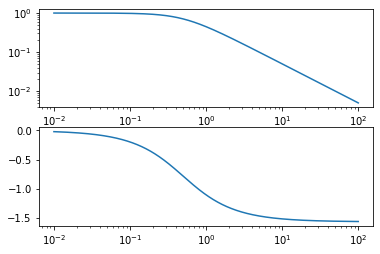

In [14]:
bode(G1)

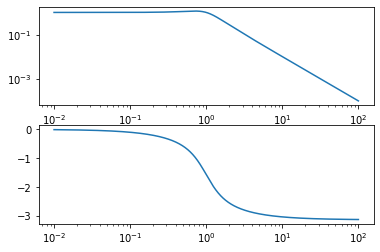

In [15]:
bode(G2)

It is easy to predict how the product of the two functions would look since both plots add together when the transfer functions are multiplied.

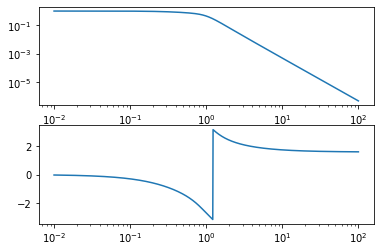

In [16]:
bode(G1*G2)

## Phase unwrapping
Wait... What happened in that plot? That discontinuity happens when the angle reaches $-\pi$ and starts counting positive angles, jumping to $\pi$. To get rid of this, we need to redefine our Bode function to use the function `numpy.unwrap` which removes discontinuities by subtracting an appropriate multiple of $2\pi$.

In [17]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(omega, numpy.abs(G))
    ax_phase.semilogx(omega, numpy.unwrap(numpy.angle(G)))

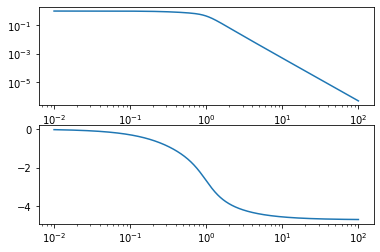

In [18]:
bode(G1*G2)

Much better.

## Nyquist

Nyquist diagrams are simply the real and imaginary components of the frequency response plotted on a plane. By convention not only the positive frequencies are plotted but the negative as well. This is the image of $G(s)$ as $s$ traverses the entire imaginary line.


In [19]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')

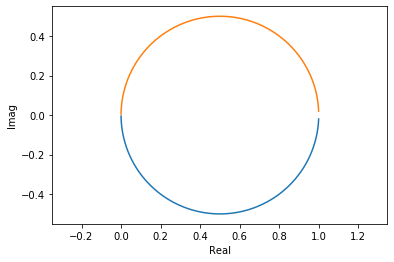

In [20]:
nyquist(G1)

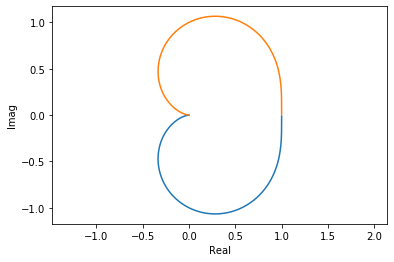

In [21]:
nyquist(G2)

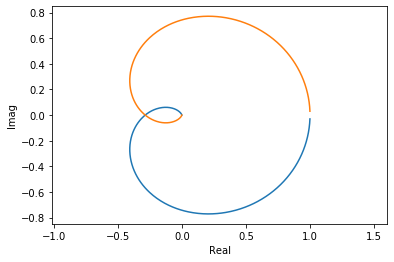

In [22]:
nyquist(G1*G2)

You can see an extra 90° twist for every order below the line.

## With the control library

The control library saves us some typing to create these diagrams:

In [23]:
import control

In [24]:
G = control.tf(1, [tau**2, 2*tau*zeta, 1])

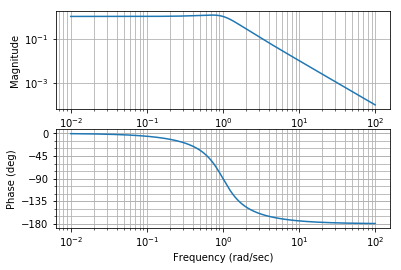

In [25]:
control.bode(G, omega);

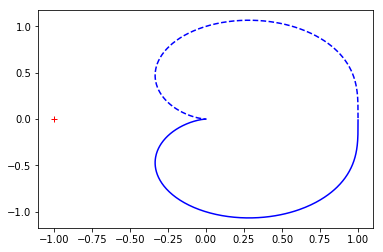

In [26]:
control.nyquist_plot(G, omega);